#### 정규화하지 않는 데이터로 모델링

In [1]:
import pandas as pd

# 사용할 모델
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from freeman.plt_setting import plt_settings
from freeman.evaluation import regression_evaluation, f_importances, plot_actual_pred
from freeman.aiddd.data_manager import read_data

plt_settings()

In [2]:
df_X = read_data('fb-scaling-not-pos-X')
df_y = read_data('fb-scaling-not-pos-y')

In [3]:
training_columns = df_X.columns

In [4]:
X_train, X_test, y_train, y_test = \
    train_test_split(df_X, df_y, test_size=0.1)

In [5]:
SEED = 123
ml_models = {
    'LASSO': Lasso(),
    'RIDGE': Ridge(),
    'KNR': KNeighborsRegressor(),
    'DTR': DecisionTreeRegressor(),
    'RFR': RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=SEED),
    'GBR': GradientBoostingRegressor(),
    'EN': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=SEED),
    'XGR': XGBRegressor(eta=0.01, n_estimators=100, n_jobs=-1),
}

In [6]:
def model_fit_and_evaluation(model_key, display_start=0, display_size=50):
    model = ml_models[model_key]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f'Evaluation: {model_key}')
    evaluation_value = regression_evaluation(y_test, predictions)
    evaluation_values.append(evaluation_value)
    model_names.append(model_key)
    try:
        f_importances(model, training_columns, model_key)
    except AttributeError as e:
        print(f'`{model_key}` object has no attribute `feature_importances_`')
    plot_actual_pred(
        y_test[display_start:display_start+display_size],
        predictions[display_start:display_start+display_size],
        model_key
    )

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.507e+16, tolerance: 1.275e+13
  model = cd_fast.enet_coordinate_descent(


Evaluation: LASSO
R2_SCORE: 0.606153, MAPE: 21.661298, MSE: 3600463233877.589844, RMSE: 1897488.665020, MAE: 999291.385364
`LASSO` object has no attribute `feature_importances_`


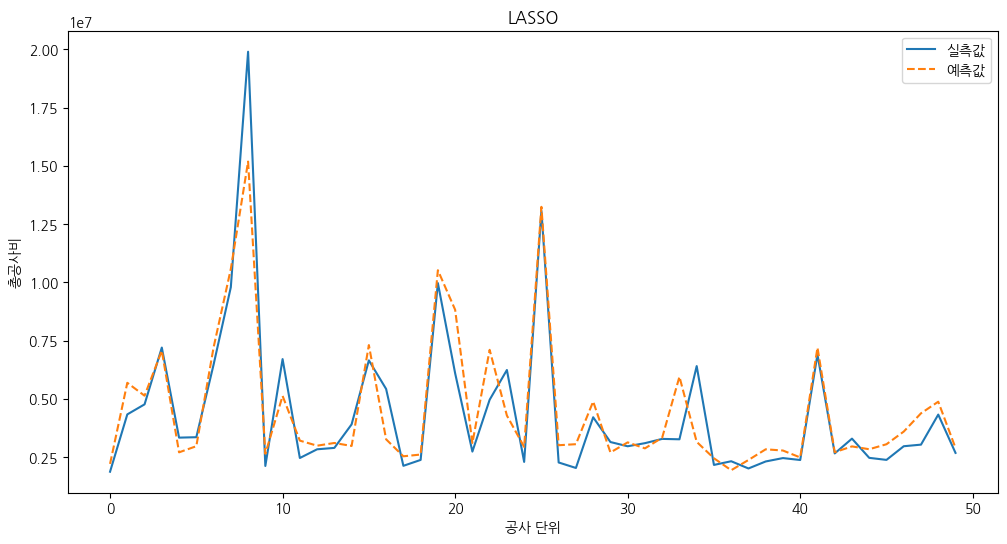

Evaluation: RIDGE
R2_SCORE: 0.606040, MAPE: 21.663810, MSE: 3601498126439.190430, RMSE: 1897761.346018, MAE: 999522.166933
`RIDGE` object has no attribute `feature_importances_`


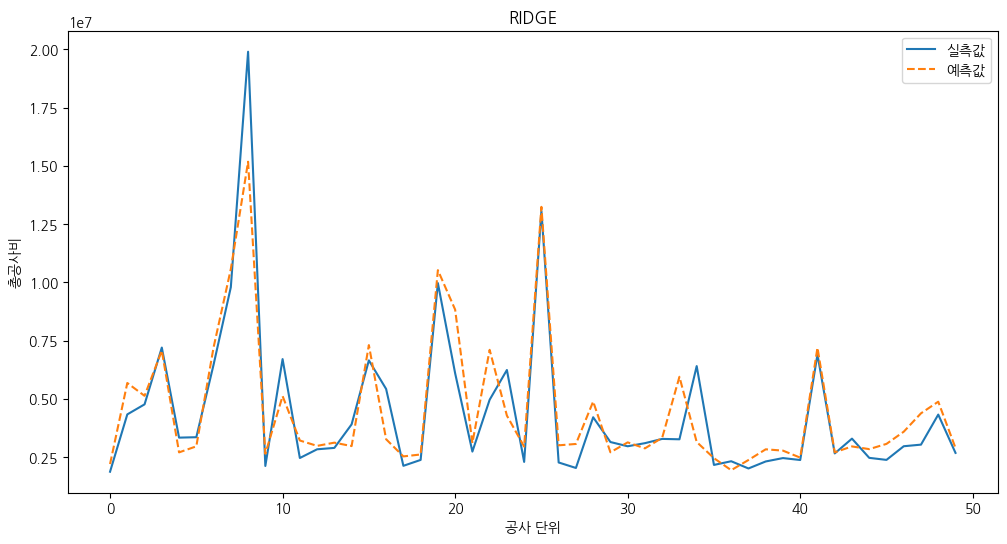

Evaluation: KNR
R2_SCORE: 0.496954, MAPE: 22.552204, MSE: 4598741031489.753906, RMSE: 2144467.540321, MAE: 1081894.686511
`KNR` object has no attribute `feature_importances_`


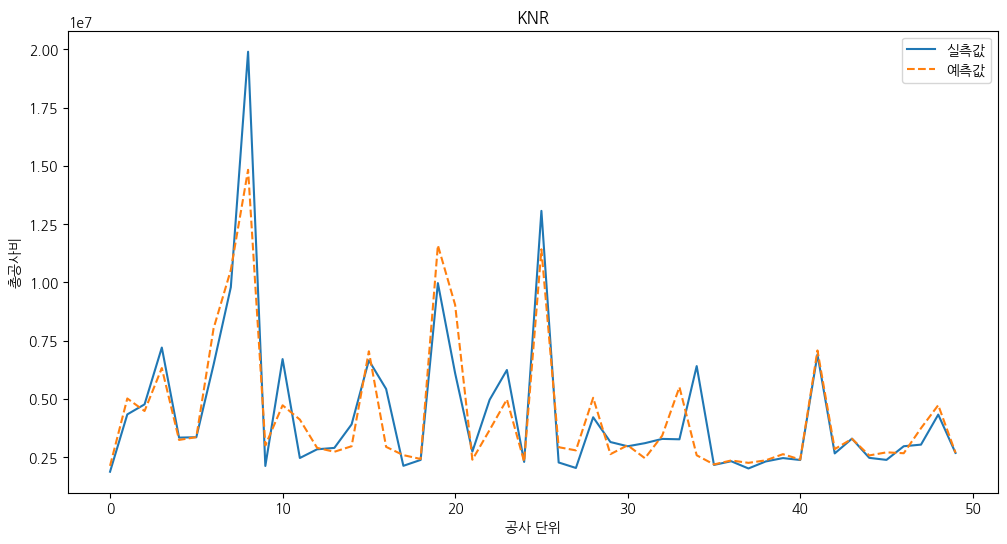

Evaluation: DTR
R2_SCORE: 0.191504, MAPE: 28.154018, MSE: 7391100256732.126953, RMSE: 2718657.804273, MAE: 1325727.215147


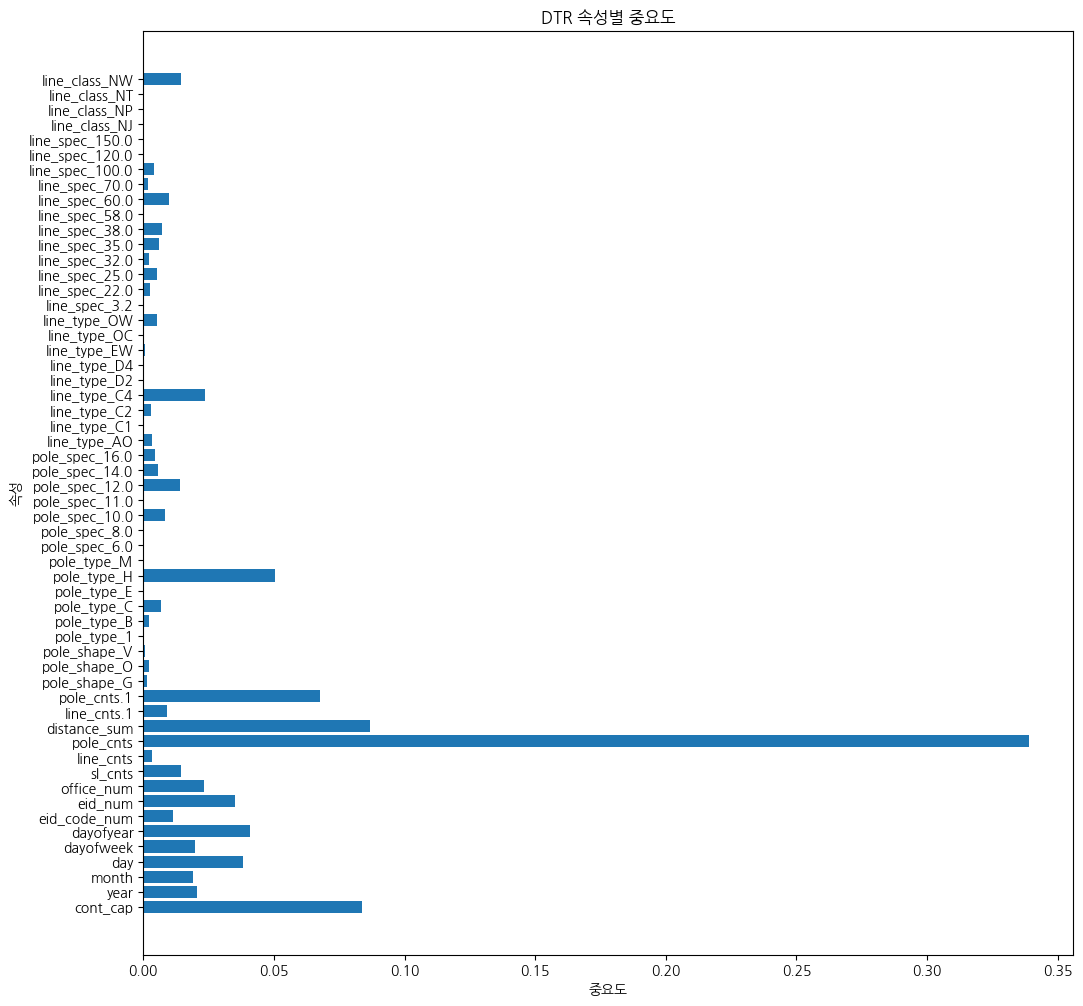

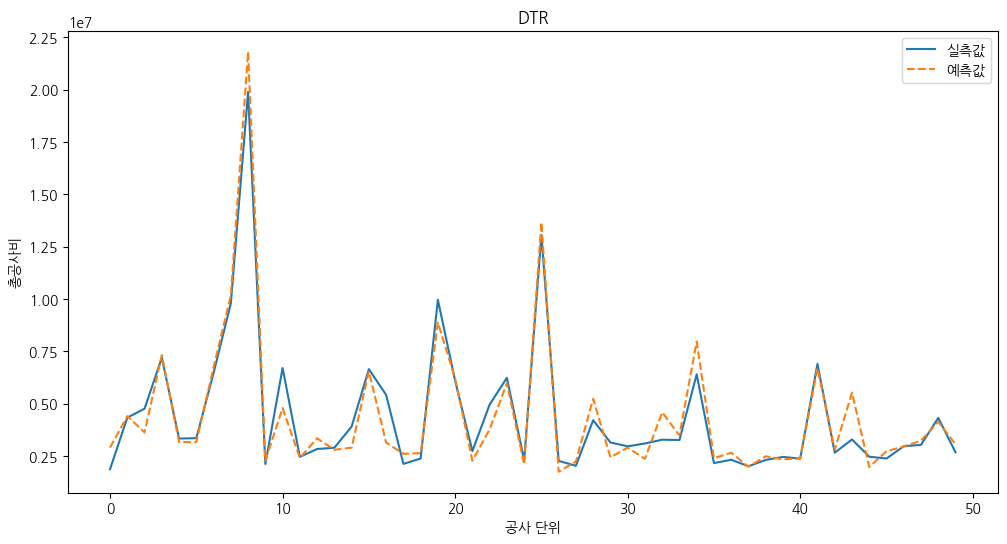

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Evaluation: RFR
R2_SCORE: 0.587534, MAPE: 22.187130, MSE: 3770671705330.447754, RMSE: 1941821.749114, MAE: 1024984.543427


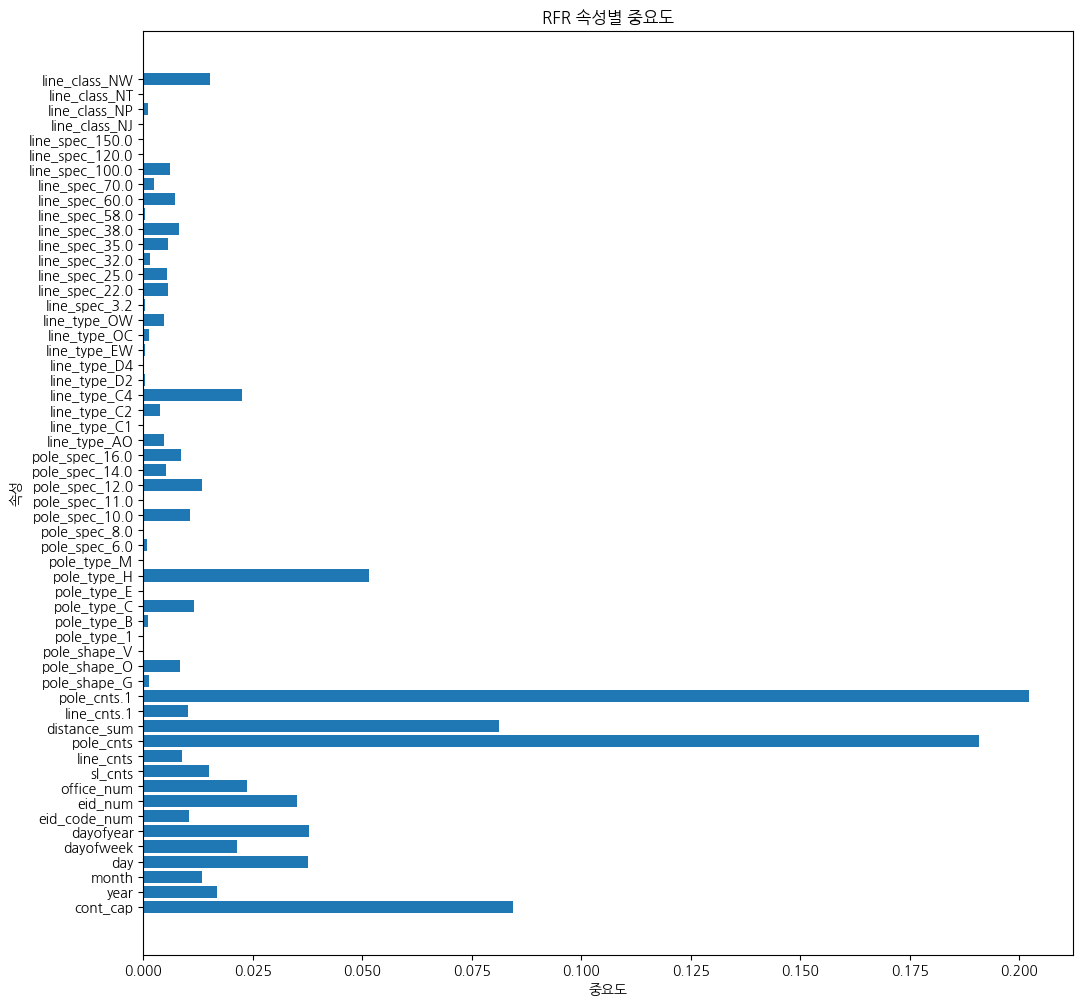

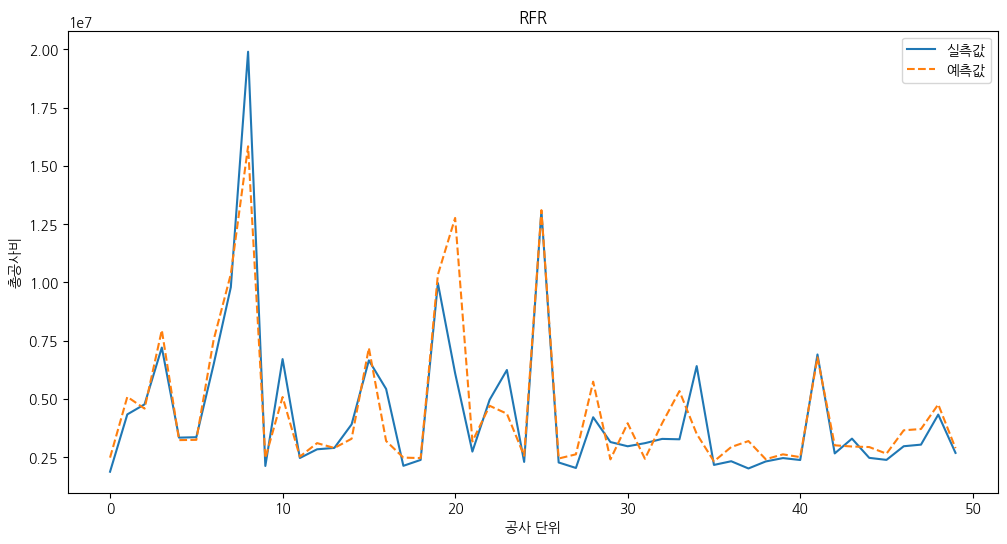

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Evaluation: GBR
R2_SCORE: 0.615156, MAPE: 20.985592, MSE: 3518158420784.751465, RMSE: 1875675.457211, MAE: 979446.127895


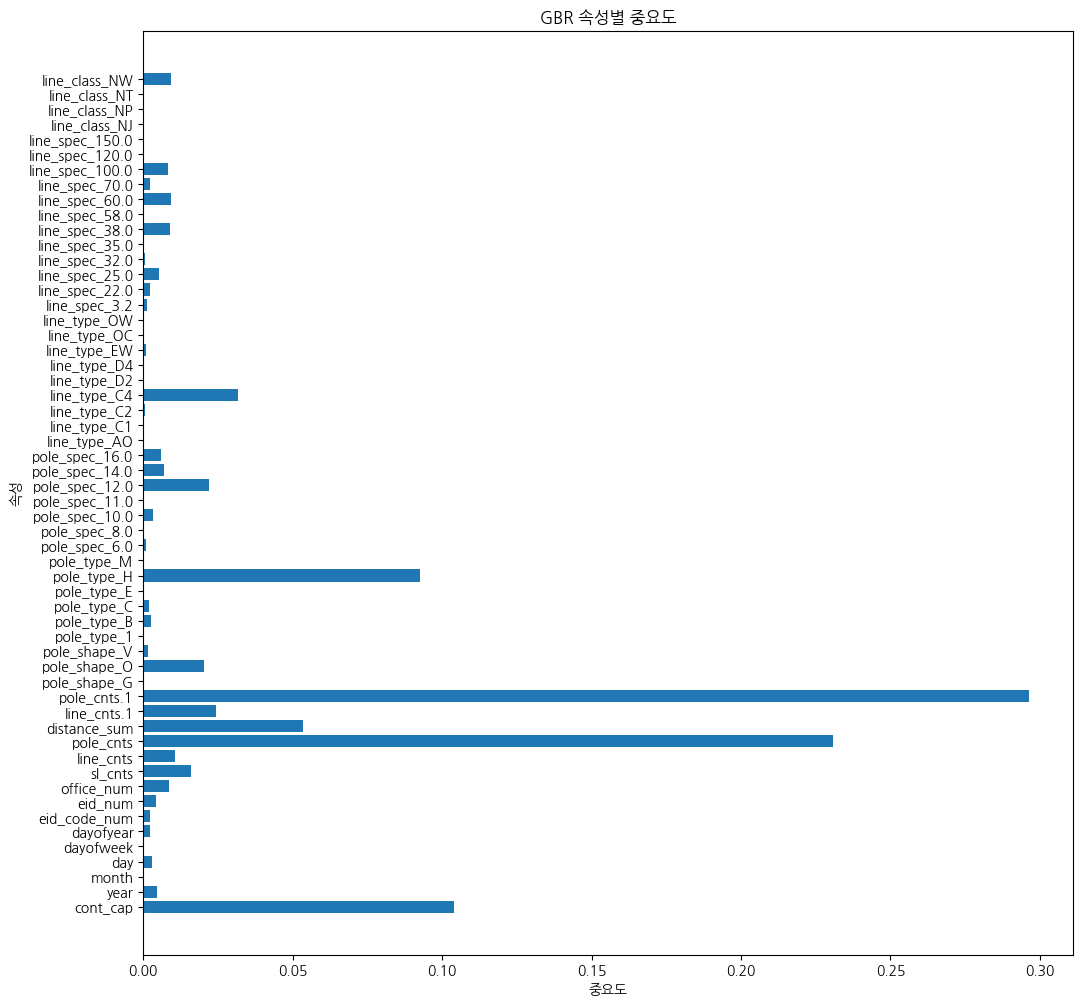

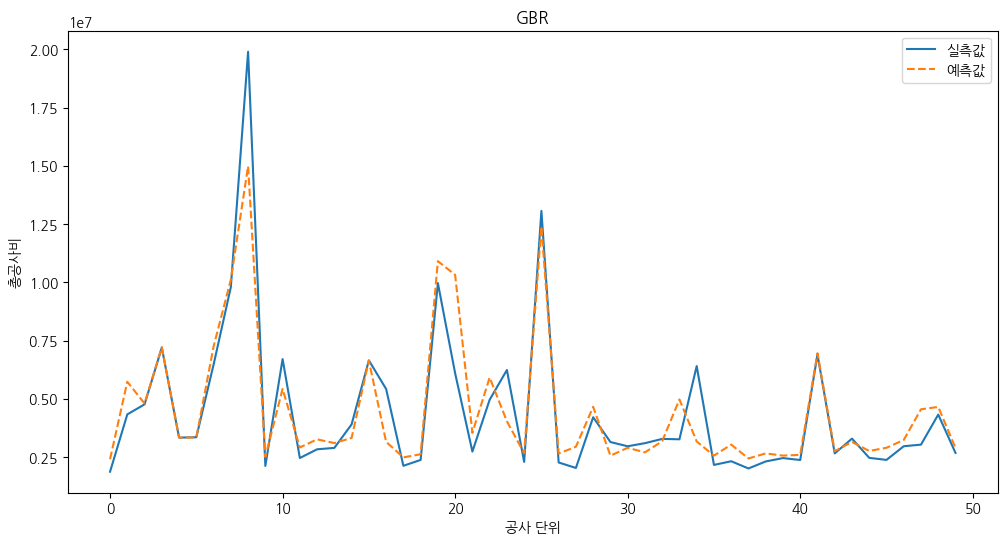

Evaluation: EN
R2_SCORE: 0.605207, MAPE: 21.735951, MSE: 3609113045316.033203, RMSE: 1899766.576534, MAE: 998709.026352
`EN` object has no attribute `feature_importances_`


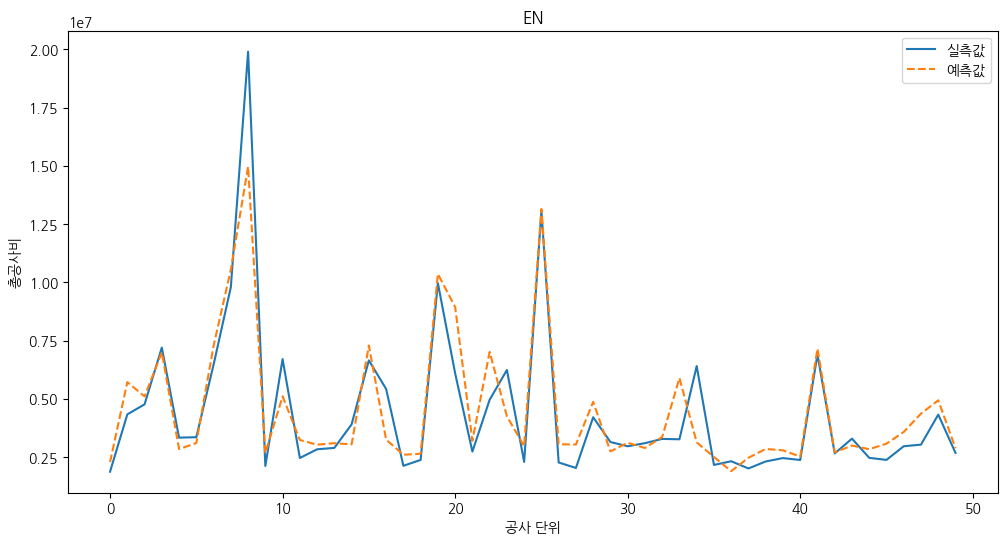

Evaluation: XGR
R2_SCORE: 0.223099, MAPE: 31.643472, MSE: 7102263402985.853516, RMSE: 2665007.205053, MAE: 1644657.321684


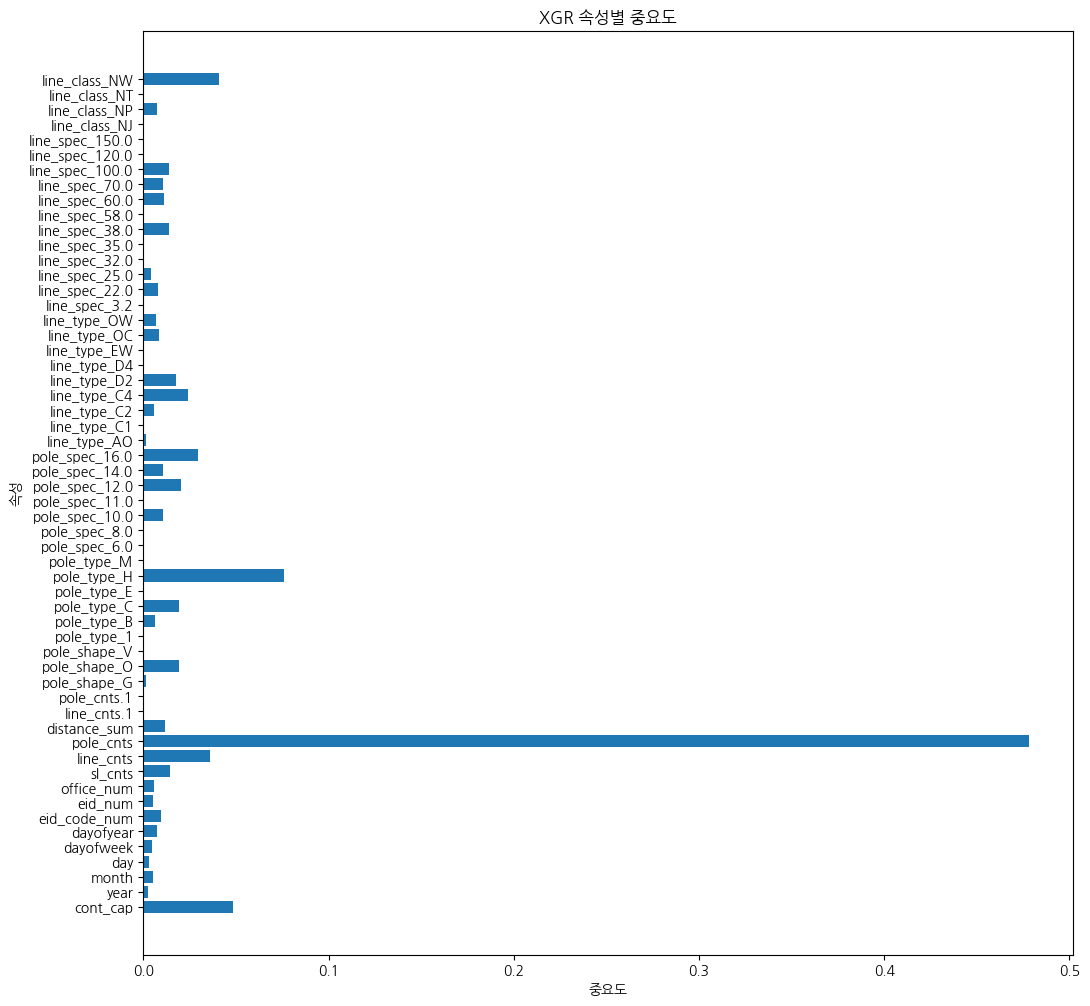

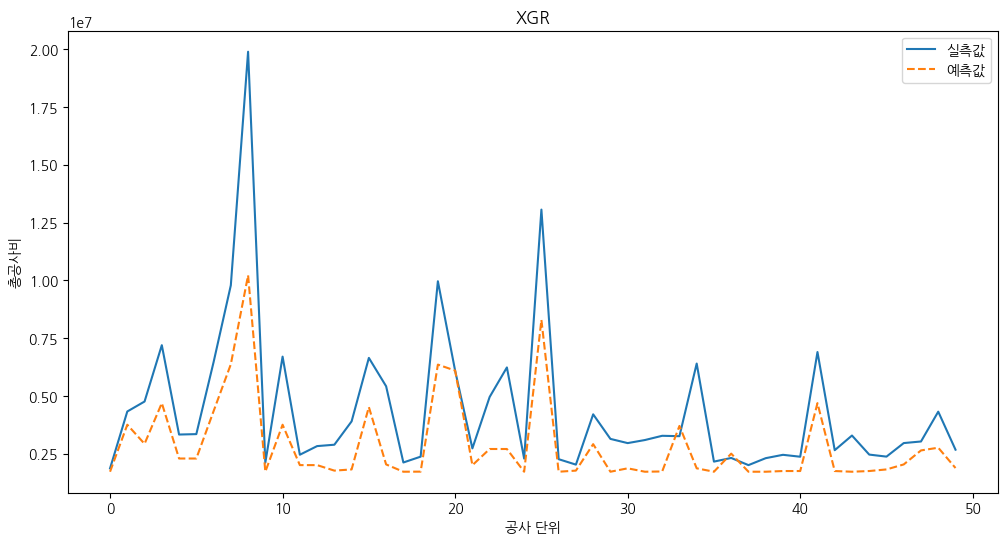

In [7]:
evaluation_values = []
model_names = []
column_names = ['r2score', 'mape', 'mse', 'rmse', 'mae']
for _model_key in ml_models.keys():
    model_fit_and_evaluation(_model_key, display_start=50, display_size=50)
    
df_evaluation = pd.DataFrame(
    evaluation_values, columns=column_names, index=model_names
)

In [8]:
df_evaluation

,r2score,mape,mse,rmse,mae
LASSO,0.606153,0.216613,3.600463e+12,1.897489e+06,9.992914e+05
RIDGE,0.606040,0.216638,3.601498e+12,1.897761e+06,9.995222e+05
KNR,0.496954,0.225522,4.598741e+12,2.144468e+06,1.081895e+06
DTR,0.191504,0.281540,7.391100e+12,2.718658e+06,1.325727e+06
RFR,0.587534,0.221871,3.770672e+12,1.941822e+06,1.024985e+06
GBR,0.615156,0.209856,3.518158e+12,1.875675e+06,9.794461e+05
EN,0.605207,0.217360,3.609113e+12,1.899767e+06,9.987090e+05
XGR,0.223099,0.316435,7.102263e+12,2.665007e+06,1.644657e+06
